In [2]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ABALONE_DATASET = '../data/abalone.csv'

In [4]:
df = pd.read_csv(ABALONE_DATASET)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Анализ данных

In [6]:
# Размер датасета
df.shape

(4177, 9)

In [7]:
# Число столбцов
df.shape[1]

9

In [8]:
# количество пропусков в столбцах
df.isna().sum()

Sex                0
Length             0
Diameter          99
Height             0
Whole weight      99
Shucked weight     0
Viscera weight     0
Shell weight      50
Rings              0
dtype: int64

- Видно, что в столбцах Diameter, Whole weight и Shell weight есть пропущенные значения;
- Название столбцов лучше переименовать для дальнейшего использования;
- Типы данных выбраны корректно, изменять не требуется.

Заменим пустые значения медианой в столбцах.

In [9]:
df.fillna({
    'Diameter': df['Diameter'].median(),
    'Whole weight': df['Whole weight'].median(),
    'Shell weight': df['Shell weight'].median()
}, inplace=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Дублирующие строки в датафрейме отсутствуют.

# Визуализация данных

In [12]:
sex = df.groupby(
    'Sex', as_index=False
).agg({
    'Rings': 'count'
})

<Axes: xlabel='Sex', ylabel='Rings'>

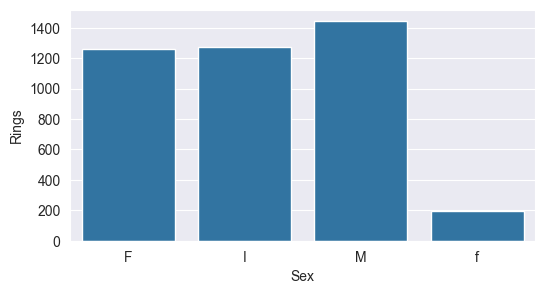

In [13]:
plt.figure(figsize=(6, 3))
sns.barplot(data=sex, x=sex['Sex'], y=sex['Rings'])

Видим, что в нашем датасете ошибка, так как должно быть 3 категории пола, а не 2. Вероятно, в данных есть опечатка

In [14]:
df.loc[df['Sex'] == 'f', 'Sex'] = 'F'

<Axes: xlabel='Sex', ylabel='Rings'>

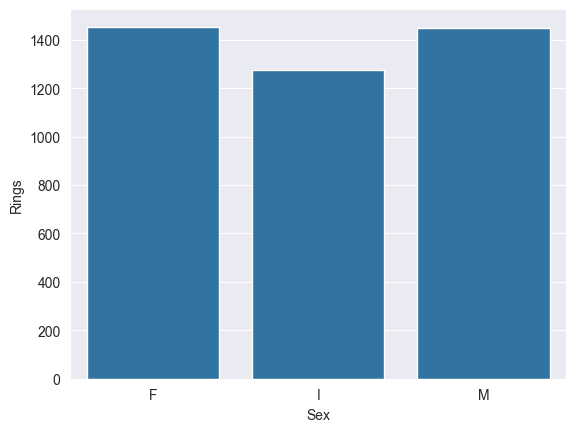

In [15]:
sex = df.groupby('Sex', as_index=False) \
    .agg({'Rings': 'count'})


sns.barplot(data=sex, x=sex['Sex'], y=sex['Rings'])

Мы видим, что в нашем датасете 3 категории пола: M, F и I. Наибольшее количество экземпляров относится к категории M, а наименьшее - к категории I.

In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,9.933684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Видим, что максимальное Rings равно 29, медиана равна 9 и минимальное 1. У Height максимальное значение 1.13, хотя значение кватиля 75 всего 0.165. Похоже на выброс.

<Axes: xlabel='Length', ylabel='Count'>

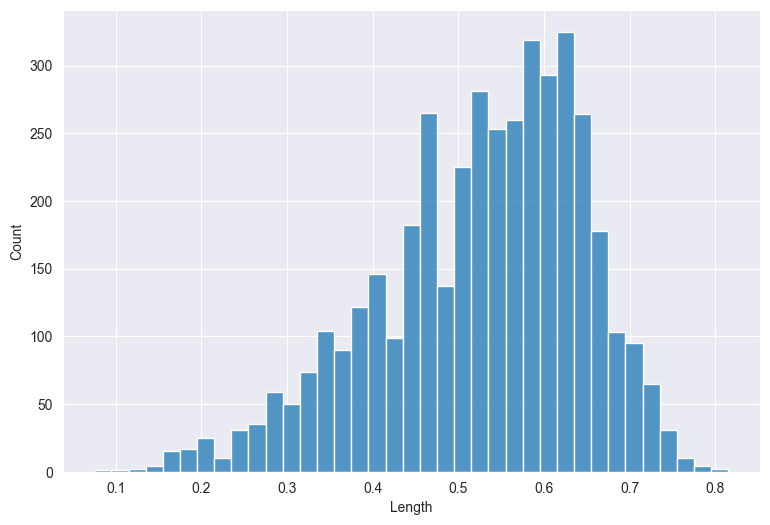

In [17]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Length')

На графике видим, что распределение по длине имеет правый хвост, то есть есть экземпляры с большой длиной. В целом, распределение похоже на нормальное, но с некоторыми выбросами.

<Axes: xlabel='Diameter', ylabel='Count'>

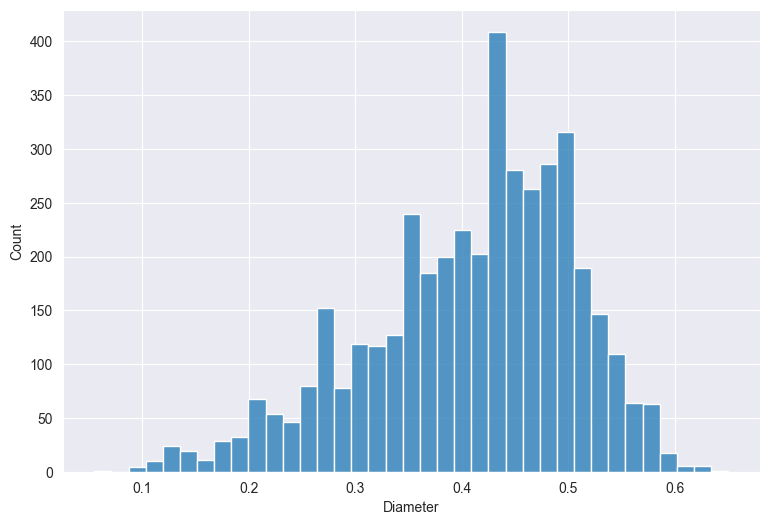

In [18]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Diameter')

На графике видно, что есть заметное большинство в значении 0.42

<Axes: xlabel='Height', ylabel='Count'>

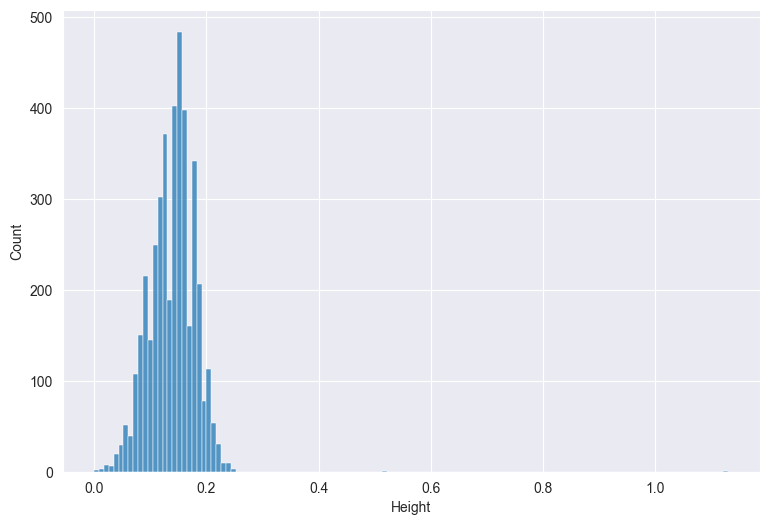

In [19]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Height')

Видим, что есть выбросы, так как максимальное значение 1.13 значительно превышает 75-й квантиль, который равен 0.165. Это может указывать на ошибку в данных.

<Axes: xlabel='Whole weight', ylabel='Count'>

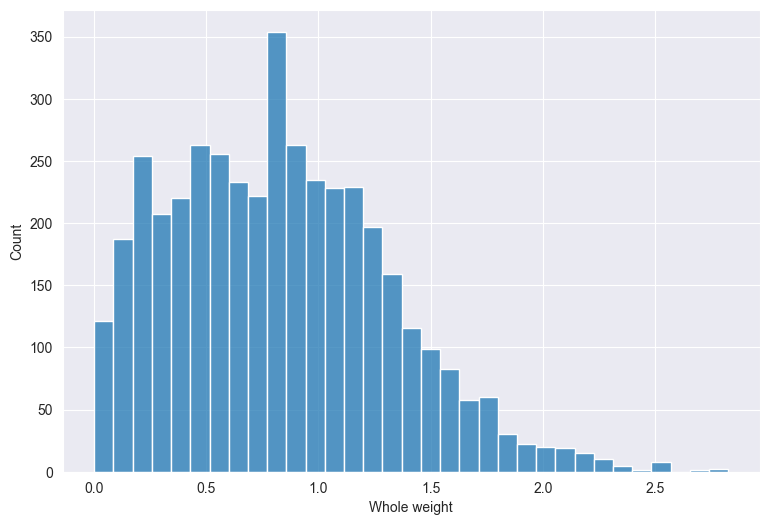

In [20]:
plt.figure(figsize=(9, 6))
sns.histplot(df, x='Whole weight')

Чем больше вес, тем меньше экземпляров. Видно, что есть выбросы, так как максимальное значение 2.825 значительно превышает 75-й квантиль, который равен 0.7705.

<Axes: xlabel='Shucked weight', ylabel='Count'>

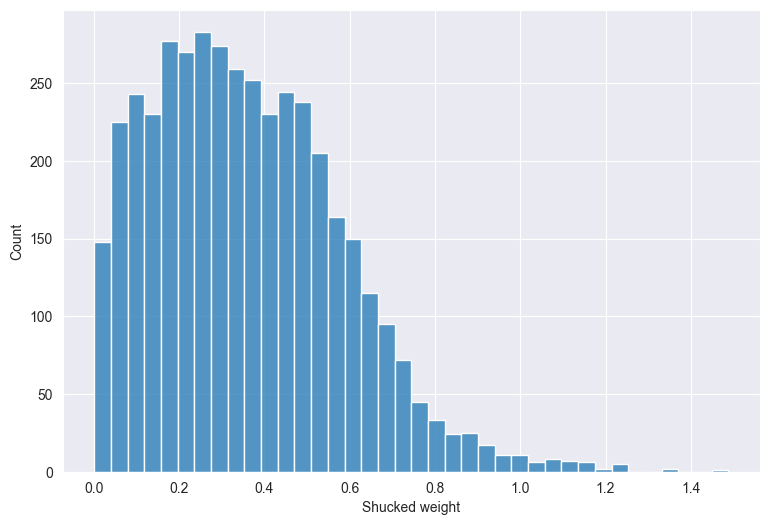

In [21]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Shucked weight')

Чем больше вес, тем меньше экземпляров. Видно, что есть выбросы, так как максимальное значение 1.488 значительно превышает 75-й квантиль, который равен 0.3555.

<Axes: xlabel='Viscera weight', ylabel='Count'>

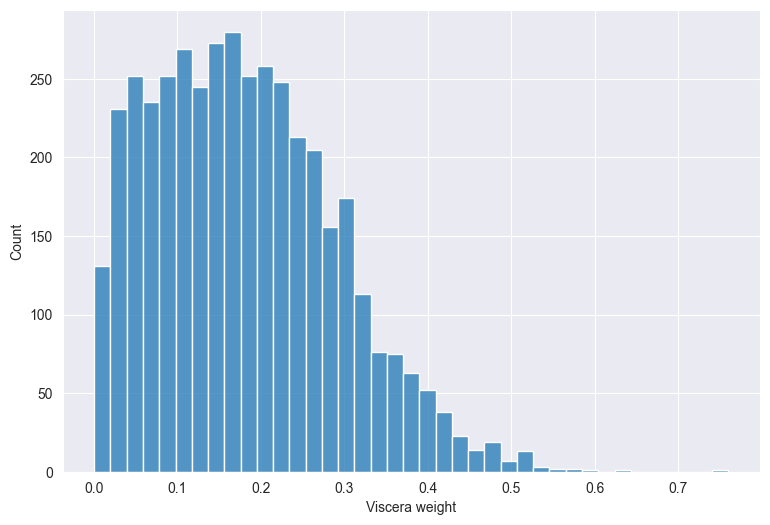

In [22]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Viscera weight')

Чем больше вес, тем меньше экземпляров. Видно, что есть выбросы, так как максимальное значение 0.76 значительно превышает 75-й квантиль, который равен 0.195.

<Axes: xlabel='Shell weight', ylabel='Count'>

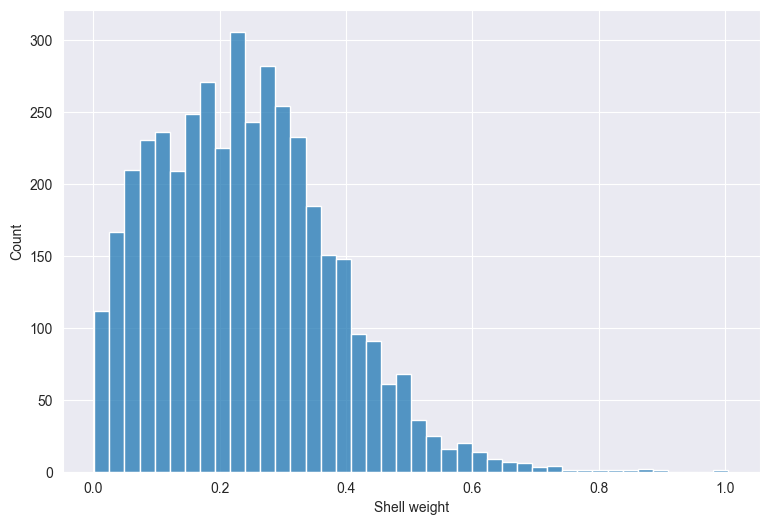

In [23]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Shell weight')

Похоже, что опять есть выбросы, так как максимальное значение. Чем больше вес, тем меньше экземпляров.

In [24]:
df[df.Height == df.Height.max()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2051,F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8


<Axes: xlabel='Rings', ylabel='Count'>

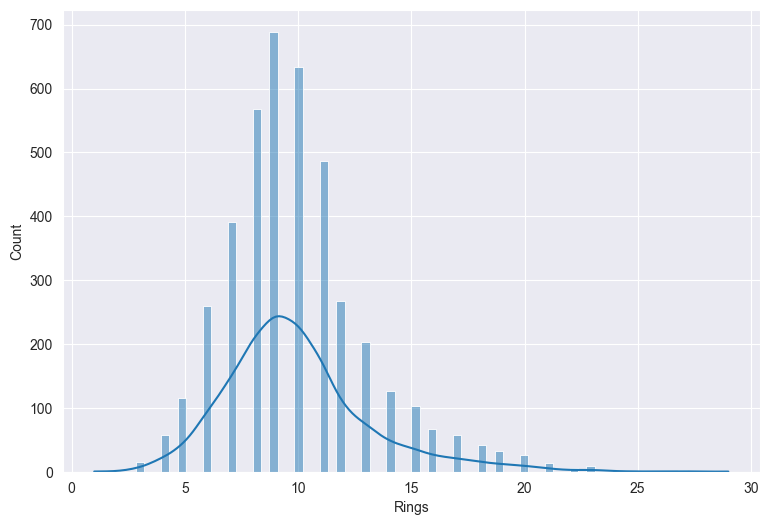

In [25]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Rings', kde=True)

По графику rings видно, что распределение нормальное. Большинство наблюдений собрались вокруг среднего значения

<Axes: xlabel='Rings'>

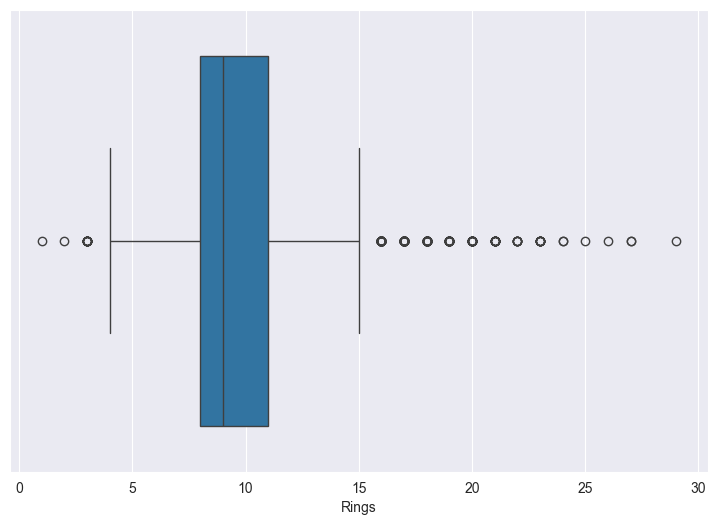

In [26]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Rings")

Тоже самое можно сказать и по графику boxplot, так как большинство наблюдений собрались вокруг среднего значения, а выбросов нет.

Используем one-hot кодирование для категориального признака 'Sex' и построим тепловую карту корреляции по всем столбцам.

In [27]:
# One-hot кодирование категорий (например 'Sex') и корреляция по всем столбцам
df_enc = pd.get_dummies(df, columns=['Sex'], drop_first=False)
df_enc = df_enc.fillna(df_enc.median(numeric_only=True))

Создадим тепловую карту корреляции для всех столбцов, включая закодированные категории пола.

In [29]:
# Удаляем лишние столбцы, если они есть (например, 'Sex_M', 'Sex_F', 'Sex_I')
df_enc.drop(columns=['Sex_F', 'Sex_I', 'Sex_M'], inplace=True)

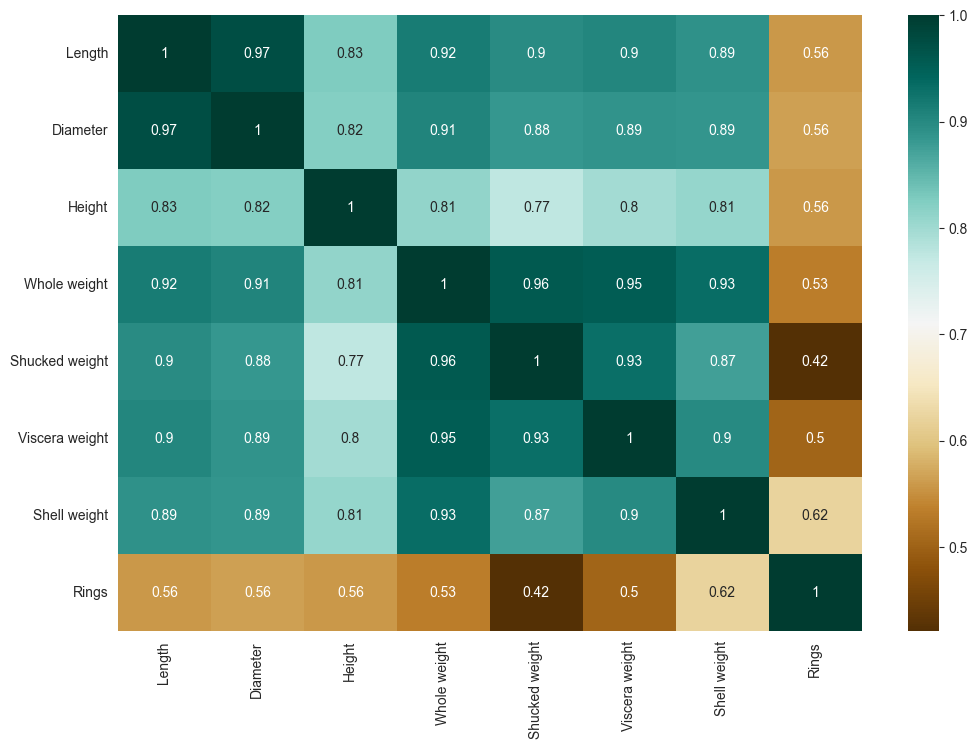

In [30]:
corr_enc = df_enc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_enc, cmap='BrBG', annot=True)
plt.show()

Мы видим, что почти всё между собой сильно коррелирует, кроме нашей цели.

In [31]:
from scipy.stats import f_oneway

In [32]:
CategoryGroupLists = df.groupby('Sex')['Rings'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.353038958662429e-182


In [33]:
if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

Features are correlated


One-way ANOVA показал, что p-value меньше 0.05, что означает, что есть статистически значимая разница в среднем количестве колец (Rings) между различными

# Выводы

- В нашем датасете 3 категории пола: M, F и I. Наибольшее количество экземпляров относится к категории M, а наименьшее - к категории I.
- В данных есть выбросы, особенно в столбце Height, где максимальное значение значительно превышает 75-й квантиль. Это может указывать на ошибку в данных, и стоит рассмотреть возможность удаления или корректировки этих выбросов.
- Распределение по длине (Length) имеет правый хвост, что указывает на наличие экземпляров с большой длиной. В целом, распределение похоже на нормальное, но с некоторыми выбросами.
- Распределение по количеству колец (Rings) похоже на нормальное, так как большинство наблюдений собрались вокруг среднего значения, и выбросов нет.
- One-way ANOVA показал, что есть статистически значимая разница в среднем количестве колец (Rings) между различными категориями.
- Почти все признаки сильно коррелируют между собой, кроме целевой переменной Rings, что может указывать на то, что эти признаки не являются хорошими предикторами для Rings.

# Сравнение Pandas с Polars

In [34]:
df_big = df.copy()

In [35]:
for i in range(250):
    df_big = pd.concat([df_big, df])

df_big.shape

(1048427, 9)

In [36]:
df_big.to_csv('abalone_big_df.csv', index=False)

In [37]:
%%time
df_pl = pl.read_csv('abalone_big_df.csv')

CPU times: user 179 ms, sys: 27.8 ms, total: 207 ms
Wall time: 84 ms


In [38]:
%%time
df_pd = pd.read_csv('abalone_big_df.csv')

CPU times: user 247 ms, sys: 21.6 ms, total: 269 ms
Wall time: 268 ms


Мы видим, что чтение большого датасета с помощью Polars значительно быстрее, чем с помощью Pandas. Это связано с тем, что Polars оптимизирован для работы с большими объемами данных и использует многопоточность, тогда как Pandas работает в однопоточном режиме. Поэтому при работе с большими датасетами рекомендуется использовать Polars для более эффективной обработки данных.

In [39]:
%%time
df_pl.filter(pl.col('Rings') < 10.5)

CPU times: user 15.4 ms, sys: 104 ms, total: 119 ms
Wall time: 49.8 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""I""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
…,…,…,…,…,…,…,…,…
"""M""",0.55,0.43,0.13,0.8395,0.3155,0.1955,0.2405,10
"""M""",0.56,0.43,0.155,0.8675,0.4,0.172,0.229,8
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10


In [40]:
%%time
df_pd[df_pd['Rings'] < 10.5]

CPU times: user 22.4 ms, sys: 23.4 ms, total: 45.8 ms
Wall time: 46.5 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
1048420,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
1048421,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
1048423,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1048424,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Фильтрация данных в Polars также выполняется значительно быстрее, чем в Pandas, что подтверждает преимущества Polars при работе с большими объемами данных.

In [41]:
%%time
df_pl.group_by('Sex').agg(pl.mean('Rings'))

CPU times: user 17.2 ms, sys: 13.4 ms, total: 30.6 ms
Wall time: 20.8 ms


Sex,Rings
str,f64
"""M""",10.678645
"""I""",7.872257
"""F""",11.001376


In [42]:
df_pd.groupby('Sex')['Rings'].mean()

Sex
F    11.001376
I     7.872257
M    10.678645
Name: Rings, dtype: float64

Таким образом, группировка и агрегация данных в Polars выполняется быстрее, чем в Pandas, что делает Polars более эффективным инструментом для анализа больших датасетов.